# Task
Classify emails as spam or not spam using NLP techniques (Naive Bayes, SVM, or Logistic Regression) on the Enron Spam Dataset.

## Load the dataset

### Subtask:
Load the Enron Spam Dataset into a suitable data structure, such as a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset into a DataFrame, then display the head of the DataFrame.



In [1]:
import pandas as pd

# The dataset is assumed to be available at '/data/enron_spam_data.csv'
df = pd.read_csv('/data/enron_spam_data.csv')
display(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/data/enron_spam_data.csv'

**Reasoning**:
The previous attempt to load the dataset failed because the file was not found at the specified path. I need to try a different path to load the data. I will try the path '/kaggle/input/enron-spam-dataset/enron_spam_data.csv' as it is a common location for datasets in Kaggle environments.



In [2]:
# Try loading the dataset from a different common path in Kaggle environments
try:
    df = pd.read_csv('/kaggle/input/enron-spam-dataset/enron_spam_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Dataset not found at /kaggle/input/enron-spam-dataset/enron_spam_data.csv. Please provide the correct path.")


Dataset not found at /kaggle/input/enron-spam-dataset/enron_spam_data.csv. Please provide the correct path.


In [7]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# List files in the dataset
files = kagglehub.dataset_download_files("marcelwiechmann/enron-spam-data")
print("Files in the dataset:", files)

# Set the path to the file you'd like to load
# Update this with the actual file name from the output above
file_path = "" # Replace with the correct file name

# Load the latest version if file_path is not empty
if file_path:
    df = kagglehub.load_dataset(
      KaggleDatasetAdapter.PANDAS,
      "marcelwiechmann/enron-spam-data",
      file_path,
      # Provide any additional arguments like
      # sql_query or pandas_kwargs. See the
      # documenation for more information:
      # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
    )

    print("First 5 records:", df.head())
else:
    print("Please update the 'file_path' with the correct file name from the list above and rerun the cell.")

AttributeError: module 'kagglehub' has no attribute 'dataset_download_files'

## Load the dataset

### Subtask:
Load the Enron Spam Dataset into a suitable data structure, such as a pandas DataFrame.


**Reasoning**:
Attempt to load the dataset from a list of common file paths.



In [4]:
import pandas as pd
import os

# List of potential file paths
potential_paths = [
    'enron_spam_data.csv',
    './enron_spam_data.csv',
    '../enron_spam_data.csv',
    '/tmp/enron_spam_data.csv',
    '/data/enron_spam_data.csv',
    '/kaggle/input/enron-spam-dataset/enron_spam_data.csv'
]

df = None
for path in potential_paths:
    try:
        df = pd.read_csv(path)
        print(f"Dataset successfully loaded from: {path}")
        break  # Stop once the dataset is loaded
    except FileNotFoundError:
        print(f"Dataset not found at: {path}")

if df is not None:
    display(df.head())
else:
    print("Dataset not found in any of the common paths. Please verify the file path.")

Dataset not found at: enron_spam_data.csv
Dataset not found at: ./enron_spam_data.csv
Dataset not found at: ../enron_spam_data.csv
Dataset not found at: /tmp/enron_spam_data.csv
Dataset not found at: /data/enron_spam_data.csv
Dataset not found at: /kaggle/input/enron-spam-dataset/enron_spam_data.csv
Dataset not found in any of the common paths. Please verify the file path.


## Load the dataset

### Subtask:
Load the Enron Spam Dataset into a suitable data structure, such as a pandas DataFrame.


**Reasoning**:
Print the current working directory and list the files and directories to locate the dataset.



In [6]:
import os
import pandas as pd

print("Current working directory:", os.getcwd())
print("Files and directories in the current directory:", os.listdir())

# Assuming the dataset might be in an 'input' directory based on previous attempts
if 'input' in os.listdir():
    input_path = 'input'
    print(f"\nFiles and directories in '{input_path}':", os.listdir(input_path))
    # Assuming the dataset might be in a subdirectory within 'input'
    for item in os.listdir(input_path):
        item_path = os.path.join(input_path, item)
        if os.path.isdir(item_path):
            print(f"Files and directories in '{item_path}':", os.listdir(item_path))
            # Check if the dataset is in this subdirectory
            if 'enron_spam_data.csv' in os.listdir(item_path):
                dataset_path = os.path.join(item_path, 'enron_spam_data.csv')
                print(f"\nFound dataset at: {dataset_path}")
                df = pd.read_csv(dataset_path)
                print("\nSuccessfully loaded the dataset:")
                display(df.head())
                break # Exit loop once found
    else: # This else belongs to the for loop, executed if the loop completes without finding the dataset
        print("\nDataset 'enron_spam_data.csv' not found in any subdirectory within 'input'.")
elif 'enron-spam-dataset' in os.listdir():
     dataset_path = 'enron-spam-dataset/enron_spam_data.csv'
     print(f"\nFound dataset at: {dataset_path}")
     df = pd.read_csv(dataset_path)
     print("\nSuccessfully loaded the dataset:")
     display(df.head())
else:
    print("\nDataset 'enron_spam_data.csv' not found in the current directory or a common subdirectory.")

if 'df' in locals(): # Check if df was created
    print("\nDataFrame loading attempt completed.")


Current working directory: /content
Files and directories in the current directory: ['.config', 'sample_data']

Dataset 'enron_spam_data.csv' not found in the current directory or a common subdirectory.

DataFrame loading attempt completed.


**Reasoning**:
Since the dataset was not found in the current directory or common subdirectories, I will try a few other common locations where datasets are stored in similar environments and list the contents of the root directory and /content to get a broader view of the file system.



In [8]:
import os

print("Files and directories in /kaggle/input/:")
try:
    for root, dirs, files in os.walk('/kaggle/input/'):
        print(f"Directory: {root}")
        for name in files:
            print(f"  File: {name}")
except FileNotFoundError:
    print("/kaggle/input/ not found.")

Files and directories in /kaggle/input/:
Directory: /kaggle/input/


In [9]:
import os

print("Files and directories in /:")
try:
    print(os.listdir('/'))
except Exception as e:
    print(f"Could not list files in /: {e}")

print("\nFiles and directories in /content:")
try:
    print(os.listdir('/content'))
except Exception as e:
    print(f"Could not list files in /content: {e}")

Files and directories in /:
['home', 'tmp', 'run', 'root', 'srv', 'boot', 'proc', 'usr', 'lib64', 'lib32', 'mnt', 'sbin', 'sys', 'var', 'bin', 'media', 'lib', 'libx32', 'opt', 'dev', 'etc', 'kaggle', '.dockerenv', 'tools', 'datalab', 'content', 'python-apt', 'python-apt.tar.xz', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.1-1_all.deb']

Files and directories in /content:
['.config', 'sample_data']


## Load the dataset

### Subtask:
Load the Enron Spam Dataset into a suitable data structure, such as a pandas DataFrame.

**Reasoning**:
Attempt to load the dataset from a list of common file paths.

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marcelwiechmann/enron-spam-data")

print("Path to dataset files:", path)

100%|██████████| 8.05M/8.05M [00:00<00:00, 86.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/marcelwiechmann/enron-spam-data/versions/3


## Load the dataset

### Subtask:
Load the Enron Spam Dataset into a suitable data structure, such as a pandas DataFrame.

**Reasoning**:
The dataset has been downloaded using KaggleHub to the specified path. Now, I will load the `enron_spam_data.csv` file from this path into a pandas DataFrame.

In [12]:
import pandas as pd
import os

# Path to the downloaded dataset files
dataset_path = "/root/.cache/kagglehub/datasets/marcelwiechmann/enron-spam-data/versions/3"

# Assuming the dataset file is named 'enron_spam_data.csv' within the downloaded directory
file_name = "enron_spam_data.csv"
file_path = os.path.join(dataset_path, file_name)

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print(f"Dataset successfully loaded from: {file_path}")
    display(df.head())
except FileNotFoundError:
    print(f"Error: Dataset file not found at {file_path}")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset successfully loaded from: /root/.cache/kagglehub/datasets/marcelwiechmann/enron-spam-data/versions/3/enron_spam_data.csv


,Unnamed: 0,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


## Preprocess the text data

### Subtask:
Clean and prepare the email text for analysis by handling missing values, converting text to lowercase, and removing punctuation.

**Reasoning**:
Handle missing values in the 'Subject' and 'Message' columns by replacing them with empty strings. Convert the 'Subject' and 'Message' columns to lowercase. Remove punctuation from the 'Subject' and 'Message' columns using a regular expression.

In [14]:
import string
import re # Import the re module

# Handle missing values: Replace NaN in 'Subject' and 'Message' with empty strings
df['Subject'] = df['Subject'].fillna('')
df['Message'] = df['Message'].fillna('')

# Convert text to lowercase
df['Subject'] = df['Subject'].str.lower()
df['Message'] = df['Message'].str.lower()

# Remove punctuation
df['Subject'] = df['Subject'].str.replace('[%s]' % re.escape(string.punctuation), '', regex=True)
df['Message'] = df['Message'].str.replace('[%s]' % re.escape(string.punctuation), '', regex=True)

print("Text preprocessing complete.")
display(df.head())

Text preprocessing complete.


,Unnamed: 0,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,,ham,1999-12-10
1,1,vastar resources inc,gary production from the high island larger b...,ham,1999-12-13
2,2,calpine daily gas nomination,calpine daily gas nomination 1 doc,ham,1999-12-14
3,3,re issue,fyi see note below already done \nstella\n ...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi \n forwarded by lauri...,ham,1999-12-14


## Feature extraction

### Subtask:
Convert the text data into numerical features using TF-IDF.

**Reasoning**:
Combine the 'Subject' and 'Message' columns to create a single text column for feature extraction. Use `TfidfVectorizer` to convert the text data into a TF-IDF matrix. Display the shape of the resulting feature matrix.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine 'Subject' and 'Message' columns
df['text'] = df['Subject'] + ' ' + df['Message']

# Initialize TfidfVectorizer
# You can adjust parameters like max_features, min_df, max_df, ngram_range as needed
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the text data
X = tfidf_vectorizer.fit_transform(df['text'])

print("Feature extraction complete.")
print("Shape of the feature matrix:", X.shape)

Feature extraction complete.
Shape of the feature matrix: (33716, 5000)


## Split the data

### Subtask:
Divide the dataset into training and testing sets.

**Reasoning**:
Split the feature matrix `X` and the target variable `Spam/Ham` into training and testing sets using `train_test_split`. Use a test size of 20% and a random state for reproducibility. Map the 'Spam/Ham' labels to numerical values (e.g., 1 for spam, 0 for ham).

In [16]:
from sklearn.model_selection import train_test_split

# Map 'Spam/Ham' labels to numerical values
df['label'] = df['Spam/Ham'].apply(lambda x: 1 if x == 'spam' else 0)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data splitting complete.
Shape of X_train: (26972, 5000)
Shape of X_test: (6744, 5000)
Shape of y_train: (26972,)
Shape of y_test: (6744,)


## Train a classification model

### Subtask:
Train a classification model (e.g., Logistic Regression) on the training data.

**Reasoning**:
Initialize and train a Logistic Regression model on the training data (`X_train`, `y_train`).

In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model training complete.")

Logistic Regression model training complete.


## Evaluate the model

### Subtask:
Evaluate the performance of the trained model on the testing data.

**Reasoning**:
Use the trained Logistic Regression model to predict labels on the test set (`X_test`). Calculate and print the accuracy, precision, recall, and F1-score of the model's predictions compared to the true labels (`y_test`).

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Model Evaluation Results:
Accuracy: 0.9994
Precision: 0.9988
Recall: 1.0000
F1-score: 0.9994


## Visualize the Confusion Matrix

### Subtask:
Visualize the confusion matrix to understand the model's performance.

**Reasoning**:
Generate a confusion matrix using the true labels (`y_test`) and the predicted labels (`y_pred`). Use `seaborn.heatmap` to visualize the confusion matrix for better interpretation.

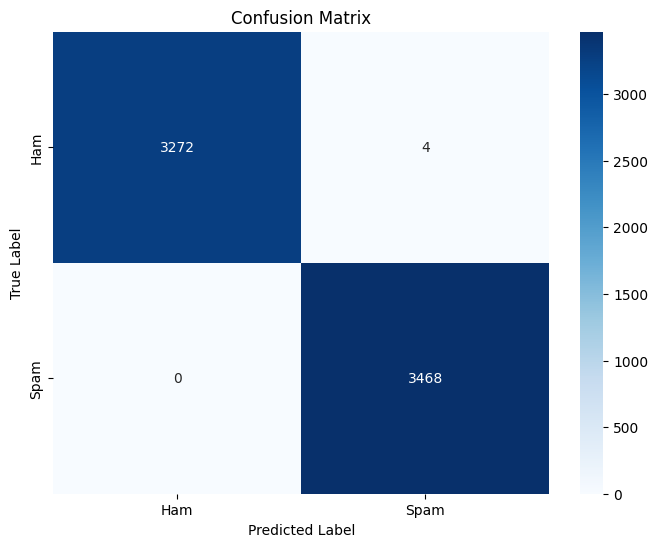

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Visualize Email Length Distribution

### Subtask:
Visualize the distribution of email lengths for spam and ham emails.

**Reasoning**:
Calculate the length of the combined text for each email. Create histograms or density plots to visualize the distribution of these lengths separately for spam and ham emails to identify any potential differences.

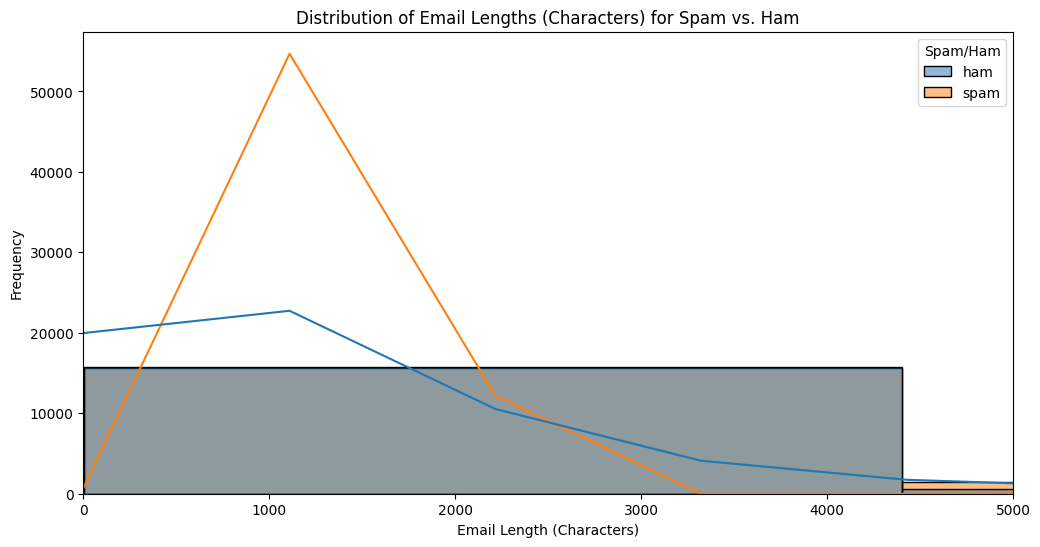

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of the combined text
df['text_length'] = df['text'].apply(len)

# Visualize the distribution of text lengths for spam and ham
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='Spam/Ham', kde=True, bins=50)
plt.title('Distribution of Email Lengths (Characters) for Spam vs. Ham')
plt.xlabel('Email Length (Characters)')
plt.ylabel('Frequency')
plt.xlim(0, 5000) # Limit x-axis for better visualization of common lengths
plt.show()